https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset?resource=download

## Environment Setup

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'c:\\Studies\\projects_bkr\\learn\\GEN AI Udemey\\Master AI, Large Language Models & Agents\\hugging_face'

## Create Dataframe form csv 

In [3]:
# read the data
df=pd.read_csv("./labeled_data.csv")
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [5]:
df.isna().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

## Visualization

In [6]:
df["class"].value_counts() 
# 0 Fake news
# 1 Offencive
# none of the above
# There are 3 different classes

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

C:\Users\bhara\AppData\Local\Temp\ipykernel_18892\3651396975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x="class",palette="viridis")


Text(0.5, 1.0, 'News belongng to Different classes')

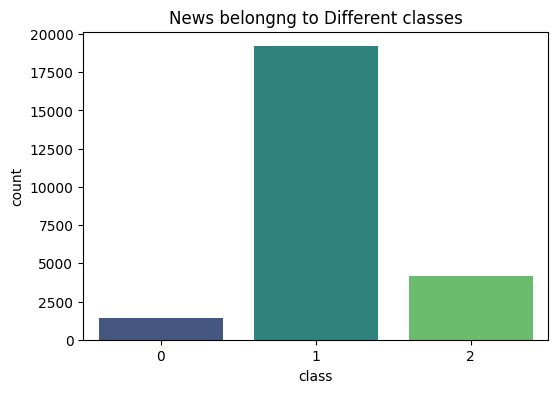

In [7]:
# histogram
plt.figure(figsize=(6,4))
sns.countplot(data=df,x="class",palette="viridis")
plt.title("News belongng to Different classes")

In [8]:
df.iloc[1,-1]

'!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!'

## Cleaning the data

In [9]:
# lets remove @mnetions(twitter handles)

df["clean_tweet"]=df["tweet"].str.replace("@\w+","",regex=True)
df.head()



<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\bhara\AppData\Local\Temp\ipykernel_18892\3042366313.py:3: SyntaxWarning: invalid escape sequence '\w'
  df["clean_tweet"]=df["tweet"].str.replace("@\w+","",regex=True)


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT : As a woman you shouldn't complain abo...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT : boy dats cold...tyga dwn bad for cu...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT Dawg!!!! RT : You ever fuck a bitc...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT : she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT : The shit you hear about me ...


In [10]:
df["clean_tweet"]=df["clean_tweet"].str.replace("!","",regex=True)
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,clean_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT : As a woman you shouldn't complain about ...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT : boy dats cold...tyga dwn bad for cuffin ...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT Dawg RT : You ever fuck a bitch and she s...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT : she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT : The shit you hear about me might be true...


## Understanding the Datasets of HuggingFace

In [11]:
# lets load rotten tomatoes dataset and explore

from datasets import load_dataset,DatasetDict,Dataset

rt=load_dataset("rotten_tomatoes")
rt

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [12]:
rt["train"][0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Create A Dataset from the Dataframe

In [13]:
# lets a create a dataset from our DataFrame 
# (Note we can create the same form csv file directly but certain transfomraations we need arent possible)

fake_news_df=Dataset.from_pandas(df)
fake_news_df


Dataset({
    features: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet', 'clean_tweet'],
    num_rows: 24783
})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
 7   clean_tweet         24783 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.5+ MB


## Split the dataset

In [15]:
# lets split the dataset into train ,test and valid sets 

# train and test set
train_test_split=fake_news_df.train_test_split(test_size=0.2) # split into train and test(20%)
print(train_test_split)

# split the above train into train and valid
train_valid_dataset=train_test_split["train"].train_test_split(test_size=0.2) # split the train into valid (20%)
print(train_valid_dataset)

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet', 'clean_tweet'],
        num_rows: 19826
    })
    test: Dataset({
        features: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet', 'clean_tweet'],
        num_rows: 4957
    })
})
DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet', 'clean_tweet'],
        num_rows: 15860
    })
    test: Dataset({
        features: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet', 'clean_tweet'],
        num_rows: 3966
    })
})


In [16]:
# final Dataset
fake_news_ds=DatasetDict({
    "train":train_valid_dataset["train"],
    "validation":train_valid_dataset["test"],
    "test":train_test_split["test"]
    
    })

In [17]:
# Examnien the dataset we have created
fake_news_ds

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet', 'clean_tweet'],
        num_rows: 15860
    })
    validation: Dataset({
        features: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet', 'clean_tweet'],
        num_rows: 3966
    })
    test: Dataset({
        features: ['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet', 'clean_tweet'],
        num_rows: 4957
    })
})

## Push to Huggingfacehub

In [18]:
fake_news_ds.push_to_hub("bkr969/fake_news")


Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/16 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/791 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/bkr969/fake_news/commit/0dc11612022cadbb0af6716cba60aea0be40ef47', commit_message='Upload dataset', commit_description='', oid='0dc11612022cadbb0af6716cba60aea0be40ef47', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/bkr969/fake_news', endpoint='https://huggingface.co', repo_type='dataset', repo_id='bkr969/fake_news'), pr_revision=None, pr_num=None)

In [19]:
# lets remove the columns
Final_ds=fake_news_ds.remove_columns(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'])
Final_ds

DatasetDict({
    train: Dataset({
        features: ['class', 'tweet', 'clean_tweet'],
        num_rows: 15860
    })
    validation: Dataset({
        features: ['class', 'tweet', 'clean_tweet'],
        num_rows: 3966
    })
    test: Dataset({
        features: ['class', 'tweet', 'clean_tweet'],
        num_rows: 4957
    })
})

## Tokenization

In [20]:
from transformers import AutoTokenizer,TFAutoModelForSequenceClassification
import tensorflow as tf

In [21]:
tokenizer=AutoTokenizer.from_pretrained("bert-base-cased")


In [22]:
text="just checking tokenization"
output=tokenizer(text)
output

{'input_ids': [101, 1198, 9444, 22559, 2734, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [23]:
tokenizer.convert_ids_to_tokens(output["input_ids"])

['[CLS]', 'just', 'checking', 'token', '##ization', '[SEP]']

In [24]:
print(f"vocab_size is :{tokenizer.vocab_size}")
print(f"Model max length is:{tokenizer.model_max_length}")
print(f"Model max length is:{tokenizer.model_input_names}")

vocab_size is :28996
Model max length is:512
Model max length is:['input_ids', 'token_type_ids', 'attention_mask']


In [25]:
# lets tokenize clean tweets
Final_ds["train"]["clean_tweet"]

['When the pussy stank  &#128514;&#128514;&#128514;&#128514;&#128514; http://t.co/X5LIVg2b0q',
 'RT : First day of spring break: ate half a pan of brownies &amp; watched 6 episodes of Parks and Rec with  &amp; &#8230;',
 ' forgot someone niglet',
 "  Don't be a bitch",
 'a bitch can have two black eyes, bloody lip, scalp bleeding, bruises, and a broken arm and still be like "but i love him" lmao',
 'Omg chloe just pulled up to my house like "come outside bitch" &#128514;&#128514;&#128514;&#128514; hella cray',
 ' hell yeah I got bokoo hoes when I had my fro',
 '"Caesar is home" RT : &#8220;: https://t.co/mw5KAojKXB"theres so much this bitch looks like. Lets start with ape shit&#8221;&#128557;&#128557;"',
 'Welcome to the family, Mia Meli #new #puppy #adorable #cute #fluffy #mutt #mybaby #girl http://t.co/a27C1XueZP',
 "   yo fat ugly ass couldn't even pull the ugly bitch in the school",
 'The only thing about niccas is they be followers smh .. Be ya self everyone else is taken',
 "I'm 

In [26]:
# function to tokenize our cleaned tweets
def tokenize_text(ds):
    return tokenizer(ds["clean_tweet"],padding="max_length",truncation=True)

In [27]:
# .map() processes each row of the dataset, applying tokenize_text to the clean_tweet column.
tokenized_dataset=Final_ds.map(tokenize_text,batched=True) 

Map:   0%|          | 0/15860 [00:00<?, ? examples/s]

Map:   0%|          | 0/3966 [00:00<?, ? examples/s]

Map:   0%|          | 0/4957 [00:00<?, ? examples/s]

In [28]:
tokenized_dataset
# input_ids, token_type_ids, and attention_mask are automatically added as a result of tokenization.

DatasetDict({
    train: Dataset({
        features: ['class', 'tweet', 'clean_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 15860
    })
    validation: Dataset({
        features: ['class', 'tweet', 'clean_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3966
    })
    test: Dataset({
        features: ['class', 'tweet', 'clean_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4957
    })
})

In [29]:
# lets remove tweet columns as we have tokenizide
final_ds=tokenized_dataset.remove_columns(['tweet', 'clean_tweet'])
final_ds

DatasetDict({
    train: Dataset({
        features: ['class', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 15860
    })
    validation: Dataset({
        features: ['class', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3966
    })
    test: Dataset({
        features: ['class', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4957
    })
})

## Converting to Tensorflow Format

In [30]:
train_dataset=final_ds["train"].with_format("tensorflow")
test_dataset=final_ds["test"].with_format("tensorflow")
validation_dataset=final_ds["validation"].with_format("tensorflow")

In [31]:
# Extracting the model parameters
train_features={x:train_dataset[x] for x in tokenizer.model_input_names}
# Creating a TensorFlow Dataset
train_set_for_final_model=tf.data.Dataset.from_tensor_slices((train_features,train_dataset["class"]))

# To shuffle and group them into batches of 8 for parralel training wit gpu
# Why shuffle (may be to reduce bias)
train_set_for_final_model=train_set_for_final_model.shuffle(len(train_dataset)).batch(8)

test_features={x:test_dataset[x] for x in tokenizer.model_input_names}
test_set_for_final_model=tf.data.Dataset.from_tensor_slices((test_features,test_dataset["class"]))
test_set_for_final_model=test_set_for_final_model.shuffle(len(test_dataset)).batch(8)


valid_features={x:validation_dataset[x] for x in tokenizer.model_input_names}
valid_set_for_final_model=tf.data.Dataset.from_tensor_slices((valid_features,validation_dataset["class"]))
valid_set_for_final_model=valid_set_for_final_model.shuffle(len(validation_dataset)).batch(8)


## importing the model

In [32]:
Model=TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased",num_labels=3)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Training the model

In [33]:
Model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)


In [34]:
history= Model.fit(train_set_for_final_model,validation_data=valid_set_for_final_model,epochs=1)


1983/1983 [==============================] - 37940s 19s/step - loss: 0.3251 - sparse_categorical_accuracy: 0.8883 - val_loss: 0.2651 - val_sparse_categorical_accuracy: 0.9080


In [35]:
# lets push the model to huggingfaec hub
Model.push_to_hub("bkr969/bert-base-cased")

tf_model.h5:   0%|          | 0.00/434M [00:00<?, ?B/s]

In [36]:
Model.evaluate(valid_set_for_final_model)

496/496 [==============================] - 2482s 5s/step - loss: 0.2651 - sparse_categorical_accuracy: 0.9080


[0.26512259244918823, 0.907967746257782]

**We achieved an accuracy of 90% for 1 epoch and the model can still learn the patterns**
<br>**It took 8 hrs to train this model as my pc specs arent enough**

## Predictions

In [37]:
# Use the model to predict on the test set
predictions = Model.predict(test_set_for_final_model)

620/620 [==============================] - 3022s 5s/step


In [38]:
predictions

TFSequenceClassifierOutput(loss=None, logits=array([[-1.8962314 , -0.810161  ,  3.7613225 ],
       [-1.0965023 ,  0.25253436,  1.3981711 ],
       [-1.4583783 ,  2.2204225 , -2.0734959 ],
       ...,
       [ 0.37439683,  0.7384173 , -1.4028283 ],
       [-1.5688442 ,  2.1044943 , -0.976694  ],
       [-1.1383607 ,  2.6263325 , -2.848299  ]], dtype=float32), hidden_states=None, attentions=None)

## Final result

In [42]:
news_classifier={
    0:"Hate Speech",
    1:"Offensive ",
    2:"None of the above"
}
def classify_news(text):
    inputs=tokenizer(text,padding=True,truncation=True,return_tensors="tf")
    output=Model(inputs)["logits"]
    
    pred=np.argmax(output,axis=1)
    
    return news_classifier[pred[0]]

classify_news("wassup asshole")
    

    

'Offensive '